In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, HashingVectorizer
from sklearn.linear_model import LogisticRegression
from utils import preprocess
import os
import sys
from jupyterthemes import jtplot
jtplot.style(context="notebook", theme="monokai", ticks=True)

In [2]:
# Load the data
df = pd.read_csv("./DATA/spam_ham_dataset.csv")
df.head(5)

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [3]:
# Load some texts
for i, text in enumerate(df["text"].values[:20]):
    print(f"Text{i}",text)

Text0 Subject: enron methanol ; meter # : 988291
this is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary
flow data provided by daren } .
please override pop ' s daily volume { presently zero } to reflect daily
activity you can obtain from gas control .
this change is needed asap for economics purposes .
Text1 Subject: hpl nom for january 9 , 2001
( see attached file : hplnol 09 . xls )
- hplnol 09 . xls
Text2 Subject: neon retreat
ho ho ho , we ' re around to that most wonderful time of the year - - - neon leaders retreat time !
i know that this time of year is extremely hectic , and that it ' s tough to think about anything past the holidays , but life does go on past the week of december 25 through january 1 , and that ' s what i ' d like you to think about for a minute .
on the calender that i handed out at the beginning of the fall semester , the retreat was scheduled for the weekend of january 5 - 6 . but because of a youth ministers conference that brad an

In [4]:
# Load some preprocessed version
for i, text in enumerate(df["text"].values[:20]):
    print(f"Text{i}", preprocess(text, stem=True))

Text0 ['subject  enron methanol  meter   follow note gave monday     preliminari flow data provid daren   pleas overrid pop  daili volum  present zero  reflect daili activ obtain ga control  chang need asap econom purpos ']
Text1 ['subject  hpl nom januari   see attach file  hplnol  xl   hplnol  xl']
Text2 ['subject  neon retreat ho ho ho   around wonder time year    neon leader retreat time  know time year extrem hectic   tough think anyth past holiday  life go past week decemb januari    like think minut  calend hand begin fall semest  retreat schedul weekend januari   youth minist confer brad dustin connect week   go chang date follow weekend  januari   come part need think  think agre  import us get togeth time recharg batteri get far spring semest  lot troubl difficult us get away without kid  etc   brad came potenti altern get togeth weekend  let know prefer  first option would retreat similar  done past sever year  year could go heartland countri inn  www   com  outsid brenham  

In [7]:
texts = df["text"].values.tolist()
label = df["label_num"].values.tolist()

preprocessed_text = preprocess(texts, stem=True)

print(f"Length of texts : {len(texts)}")
print(f"Length of preprocessed texts : {len(preprocessed_text)}")
print(f"Length of labels : {len(label)}")

Length of texts : 5171
Length of preprocessed texts : 5171
Length of labels : 5171


In [10]:
tfidf_1gram = TfidfVectorizer(min_df=5, max_df=1.0)
hashvectorizer = HashingVectorizer(n_features=2**20)

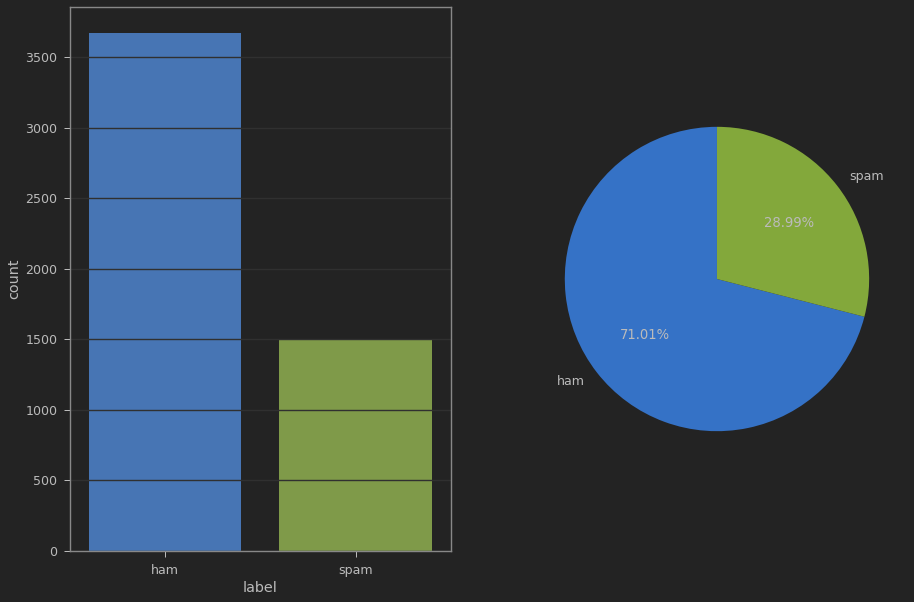

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))

count_labels = [len(np.where(np.array(label)==0)[0]), len(np.where(np.array(label)==1)[0])]

sns.countplot(x="label", data=df, ax=axes[0])
axes[1].pie(count_labels, labels=["ham", "spam"], autopct="%1.2f%%", startangle=90)

plt.show()

In [32]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(preprocessed_text, label, stratify=label)

print(f"Shape of Training texts: {len(Xtrain)}")
print(f"Shape of Training labels: {len(Ytrain)}")
print("-"*20)
print(f"Shape of Testing texts: {len(Xtest)}")
print(f"Shape of Testing labels: {len(Ytest)}")

Shape of Training texts: 3878
Shape of Training labels: 3878
--------------------
Shape of Testing texts: 1293
Shape of Testing labels: 1293


In [33]:
# Tranform features using TF-IDF
tfidf_features_1gram_train = tfidf_1gram.fit_transform(Xtrain)
tfidf_features_1gram_test = tfidf_1gram.transform(Xtest)

# Transform features using HashingVectorizer
hashvectorizer_features_train = hashvectorizer.fit_transform(Xtrain)
hashvectorizer_features_test = hashvectorizer.fit_transform(Xtest)

print(f"Number of training features using TF-IDF : {tfidf_features_1gram_train.shape}")
print(f"Number of test features using TF-IDF : {tfidf_features_1gram_test.shape}")

print("-"*20)


print(f"Number of training features using HashingVectorizer : {hashvectorizer_features_train.shape}")
print(f"Number of test features using HashingVectorizer : {hashvectorizer_features_test.shape}")

Number of training features using TF-IDF : (3878, 5087)
Number of test features using TF-IDF : (1293, 5087)
--------------------
Number of training features using HashingVectorizer : (3878, 1048576)
Number of test features using HashingVectorizer : (1293, 1048576)


In [35]:
logreg_tfidf = LogisticRegression()
logreg_hash = LogisticRegression()

logreg_tfidf.fit(tfidf_features_1gram_train, Ytrain)

print(f"Score on Training data : {logreg_tfidf.score(tfidf_features_1gram_train, Ytrain)}")
print(f"Score on Test data : {logreg_tfidf.score(tfidf_features_1gram_test, Ytest)}")

Score on Training data : 0.9940691077875193
Score on Test data : 0.9868522815158546


In [36]:
logreg_hash.fit(hashvectorizer_features_train, Ytrain)

print(f"Score on Training data : {logreg_hash.score(hashvectorizer_features_train, Ytrain)}")
print(f"Score on Test data : {logreg_hash.score(hashvectorizer_features_test, Ytest)}")

Score on Training data : 0.9883960804538422
Score on Test data : 0.9767981438515081
